In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [200]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [202]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [203]:
df.drop(['CustomerID'],axis=1, inplace=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

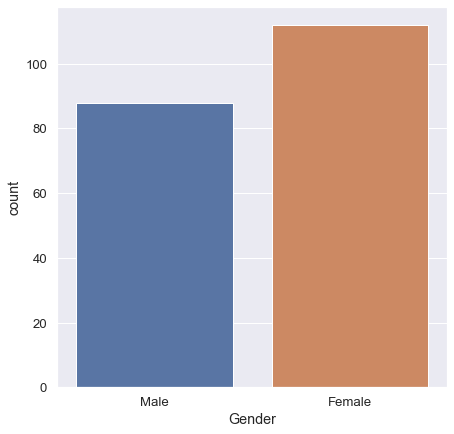

In [204]:
sns.countplot(df['Gender'])

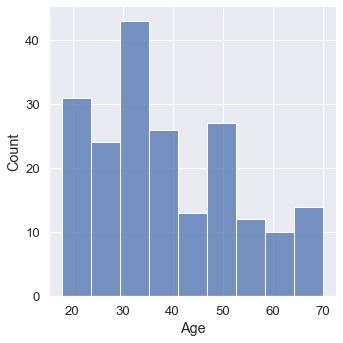

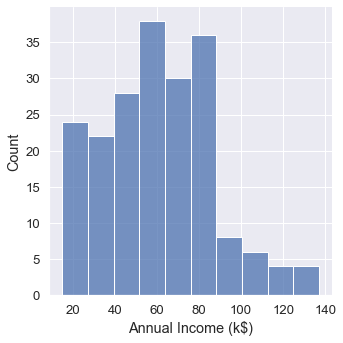

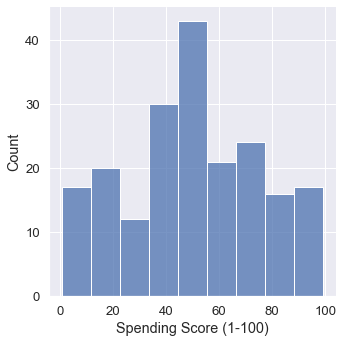

In [205]:
for col in df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]:
    sns.displot(df[col])
    plt.show()

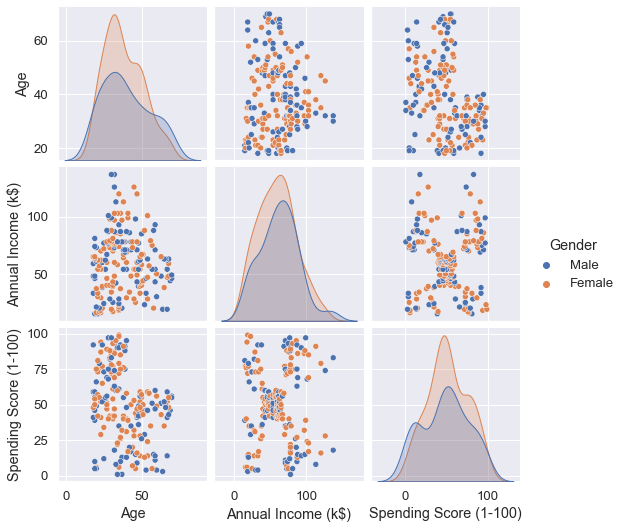

In [206]:
sns.pairplot(df, hue='Gender')

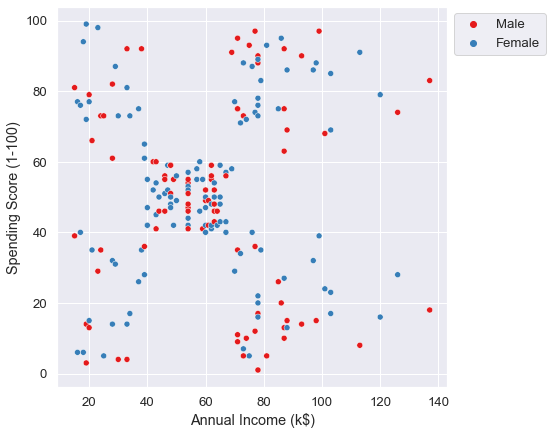

In [207]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue='Gender', palette='Set1')
plt.legend(bbox_to_anchor=(1,1),loc=2)

In [208]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [209]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [227]:
df2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### KMeans

In [228]:
scaler = StandardScaler()
df2 = scaler.fit_transform(df2)

In [229]:
scores = []
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(df2)
    scores.append(model.inertia_)
scores

[399.99999999999994,
 269.1425070447921,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.37581558455639,
 47.24294859773502,
 37.19454682305568,
 32.406659676456606]

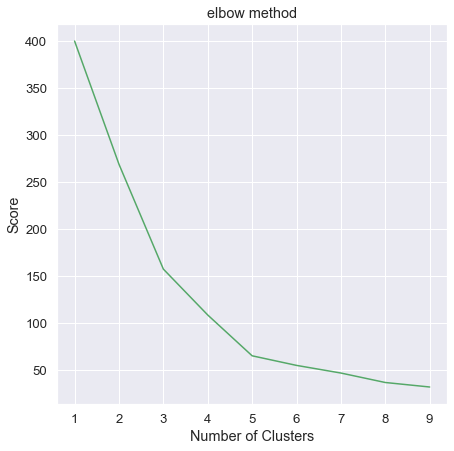

In [231]:
plt.plot(range(1,10), scores, c='g')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('elbow method')
plt.show()

In [232]:
model = KMeans(n_clusters=5)
model.fit(df2)

KMeans(n_clusters=5)

In [233]:
clusters = model.predict(df2)
clusters

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [234]:
centroids = model.cluster_centers_
centroids

array([[-0.20091257, -0.02645617],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536]])

<AxesSubplot:>

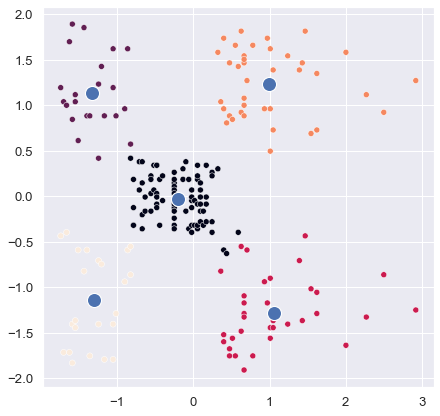

In [237]:
sns.scatterplot(df2[:, 0], df2[:, 1], c=clusters, )
sns.scatterplot(centroids[:, 0], centroids[:, 1], s=200)


## Agglomerative Clustering

In [241]:
df_copy = df[['Annual Income (k$)','Spending Score (1-100)']]
df_copy.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [242]:
scaler = StandardScaler()
df_copy = scaler.fit_transform(df_copy)

In [243]:
model = AgglomerativeClustering(n_clusters=5)
clusters = model.fit_predict(df_copy)
clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

<AxesSubplot:>

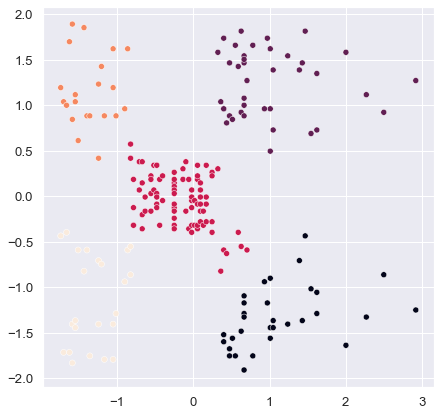

In [254]:
sns.scatterplot(df_copy[:, 0], df_copy[:, 1], c = clusters)